In [4]:
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import tools

In [33]:
# read csv file with European countries income inequality data

A = 'incomeinequality_reformatted.csv'

Inequality_csv = pd.read_csv(A)

# show income inequality csv file

Inequality_csv

,Country Name,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,AUT,4.15,4.34,4.12,4.20,4.11,4.13,4.05,4.09,4.29,4.04,4.17,NaN
1,Belgium,BEL,3.91,3.92,3.86,3.95,3.81,3.81,3.83,3.85,3.84,3.79,3.61,NaN
2,Bulgaria,BGR,5.91,5.86,6.46,6.12,6.59,6.81,7.11,7.69,8.23,7.66,8.10,8.01
3,Switzerland,CHE,4.76,4.48,4.52,4.40,4.22,4.42,4.48,4.42,4.63,4.50,4.75,NaN
4,Cyprus,CYP,4.37,4.54,4.34,4.67,4.91,5.37,5.20,4.88,4.56,4.29,4.58,NaN
5,Czechia,CZE,3.47,3.47,3.54,3.49,3.40,3.50,3.51,3.50,3.40,3.32,3.34,NaN
6,Germany,DEU,4.48,4.49,4.46,4.30,4.60,5.12,4.80,4.62,4.49,5.07,4.89,NaN
7,Denmark,DNK,4.61,4.41,3.98,3.94,4.01,4.12,4.08,4.06,4.08,4.11,4.09,NaN
8,Euro Area,EA,4.82,4.86,4.98,4.97,5.04,5.22,5.16,5.15,5.05,5.07,4.98,NaN
9,Euro Area - 18 countries (2014),EA18,4.84,4.87,4.99,4.97,5.04,5.22,5.14,5.14,5.03,5.05,4.97,NaN


In [35]:
# scatter plot for income inequality among EU countries for 2013 (change year to get scatter plot for different years)

fig = px.scatter(Inequality_csv, y="2013", x="Country Name", title='Income Inequality in 2013', color = 'Country Code')
fig.show()

In [36]:
# find max income inequality value for year and use this for to set upper limit for chloropleth colour range

year = "2013"
column = Inequality_csv[year]
max_value = column.max()

In [37]:
# create choloropleth figure for income inequality in 2013 (change year value for different years)

fig = px.choropleth(Inequality_csv, # dataset to use
                    locations = Inequality_csv["Country Code"], # column which includes 3 letter country code
                    color = Inequality_csv[year], # column which dictates the colour of the map
                    hover_name = Inequality_csv["Country Name"], # column to add to hover information
                    range_color=(0, max_value), # range of the colour scale
                    color_continuous_scale = "aggrnyl") # colour scale (these can be predefined or you can create your own)
    
fig.update_layout(
    title_text = 'Income Inequality in 2013',
#    geo_scope='europe', # limite map scope to USA
)
    
fig.show()

In [38]:
df = Inequality_csv.melt(id_vars=["Country Name",	"Country Code"], 
        var_name="Year", 
        value_name="Income Inequality")

In [39]:
df['Year'] = pd.to_numeric(df['Year'])

df.head()

,Country Name,Country Code,Year,Income Inequality
0,Austria,AUT,2009,4.15
1,Belgium,BEL,2009,3.91
2,Bulgaria,BGR,2009,5.91
3,Switzerland,CHE,2009,4.76
4,Cyprus,CYP,2009,4.37


In [40]:
df_one = df.loc[df['Country Code'] == 'GBR']
df_two = df.loc[(df['Country Code'] == 'BEL')]
df_three = df.loc[(df['Country Code'] == 'TUR')]
df_four = df.loc[(df['Country Code'] == 'BGR')]
df_five = df.loc[(df['Country Code'] == 'CYP')]

In [41]:
# line graph for incomne inequality of 5 specific countries


# fig 1
fig = px.line(df_one, x="Year", y="Income Inequality", color="Country Code",line_group="Country Code", hover_name="Country Code")
fig.update_layout(title='Income inequality' , showlegend=False)

# fig 2
fig2 = go.Figure(fig.add_traces(
                 data=px.line(df_two, x="Year", y="Income Inequality", color="Country Code",line_group="Country Code", hover_name="Country Code",color_discrete_sequence=["green"])._data))
fig2.update_layout(title='Income Inequality' , showlegend=False)

# fig 3
fig3 = go.Figure(fig.add_traces(
                 data=px.line(df_three, x="Year", y="Income Inequality", color="Country Code",line_group="Country Code", hover_name="Country Code",color_discrete_sequence=["magenta"])._data))
fig3.update_layout(title='Income Inequality' , showlegend=False)


# fig 4
fig4 = go.Figure(fig.add_traces(
                 data=px.line(df_four, x="Year", y="Income Inequality", color="Country Code",line_group="Country Code", hover_name="Country Code",color_discrete_sequence=["goldenrod"])._data))
fig4.update_layout(title='Income Inequality' , showlegend=False)


# fig 5
fig5 = go.Figure(fig.add_traces(
                 data=px.line(df_five, x="Year", y="Income Inequality", color="Country Code",line_group="Country Code", hover_name="Country Code",color_discrete_sequence=["red"])._data))
fig5.update_layout(title='Income Inequality for United Kingdom, Belgium, Turkey, Bulgaria and Cyprus' , showlegend=True)


fig5.show()

In [42]:
# line graph for incomne inequality of all countries

fig = px.line(df, x="Year", y="Income Inequality", title='Income Inequality', color="Country Code")
fig.show()

In [43]:
a = []

for i in range(12):
    
    a.append(i)

In [44]:
Year = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020']

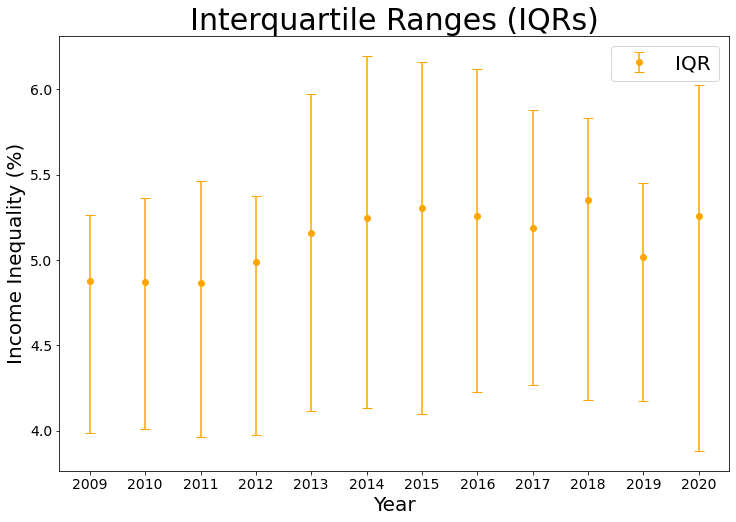

In [46]:
# interquartile range plot for all countries between 2009 and 2020

def formatting(ax):
    ax.set_xlabel('Year',fontsize = 20 )
    ax.set_ylabel('Income Inequality (%)',fontsize = 20)
    ax.tick_params(labelsize=14)
    ax.set_title('Interquartile Ranges (IQRs)', fontsize = 30)
    return ax



fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(111)


plt.errorbar(Year,  mean, yerr=[abs(mean - np.array(Q1)), abs(mean - np.array(Q3))], fmt='o', color = 'orange', capsize = 5, label = 'IQR')


ax.legend(prop={'size': 20})
ax = formatting(ax)
plt.show()